In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
data=pd.read_csv("/content/titanic-passengers.csv",sep=";")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [4]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
titanic_df_clean_age =  data['Age'].fillna(data['Age'].median(),inplace=True)
data.drop(['Cabin'], axis=1, inplace=True)


In [6]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [30]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['Sex']=encoder.fit_transform(data['Sex'])

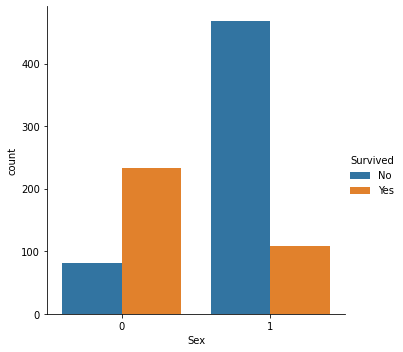

In [8]:
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = data)

In [35]:
data['Survived'] = data['Survived'].apply(lambda x:0 if x.strip()=='No' else 1)   # what is x.strip

None


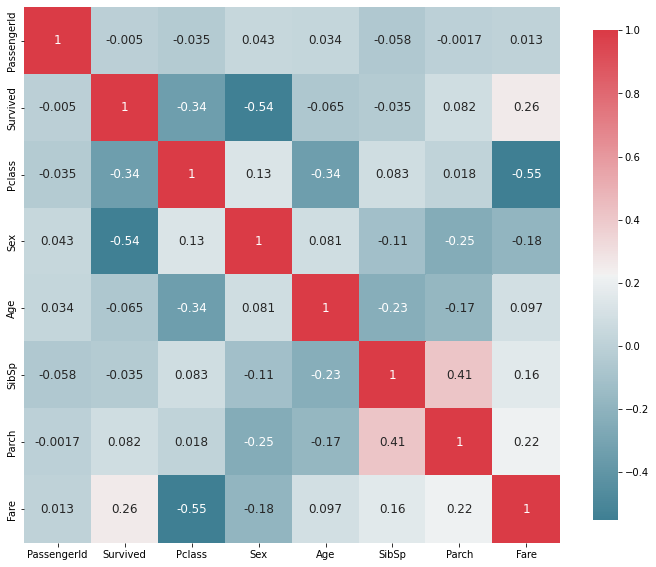

In [10]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
print(plot_correlation_map(data))

if we looked over here we will notice the connection between each cell in this matrix and its variables :) 

for Example : 

there is a strongly correlation between "siblings / spouses aboard the Titanic" and "parents / children aboard the Titanic".

in the otherhand :

 there is a negativaly correlation between "Ticket class" and "Passenger Fare" .


In [11]:
data[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


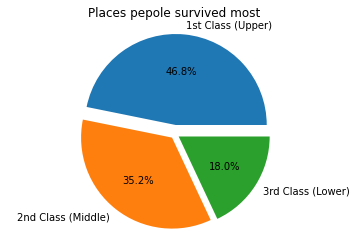

In [12]:
labels = ["1st Class (Upper)","2nd Class (Middle)","3rd Class (Lower) "]
AVGS = [0.629630,0.472826,0.242363]

plt.pie (AVGS,labels=labels,explode=(0.1,0.05,0.05),autopct='%1.1f%%')
plt.title("Places pepole survived most")
plt.axis('equal')
plt.show()

as we noticed over here :

***1st Class*** = Upper part of the ship

the AVG of the pepole survived is **(0.629630)**


***2nd Class*** = Middle part of the ship

the AVG of the pepole survived is **(0.472826)**

***3rd Class*** = Lower part of the ship

the AVG of the pepole survived is **(0.242363)**



In [13]:
survived_by_sex = data.groupby("Sex")['Survived'].mean()
survived_by_sex

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64

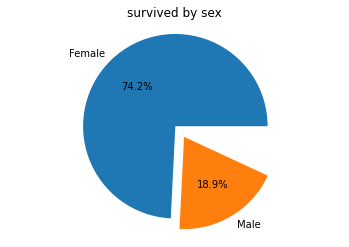

In [14]:
labels = ["Female","Male"]
AVGS = [0.742038,0.188908]

plt.pie (AVGS,labels=labels,explode=(0.1,0.05),autopct='%1.1f%%')
plt.title("survived by sex")
plt.axis('equal')
plt.show()

In [144]:
data['min_Title'] = data['Name'].apply(lambda x : x.split(',')[-1].strip())
data['Title'] = data['min_Title'].apply(lambda x : x.split('.')[0].strip())
data.drop(['min_Title'],axis=1,inplace=True)

In [145]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


In [16]:
data.drop(['Name','PassengerId'], axis=1, inplace=True)
data.drop(['Ticket'], axis=1, inplace=True)

In [ ]:
#Visualize the correlation between Title and other features(e.g Sex, Fare, Age).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


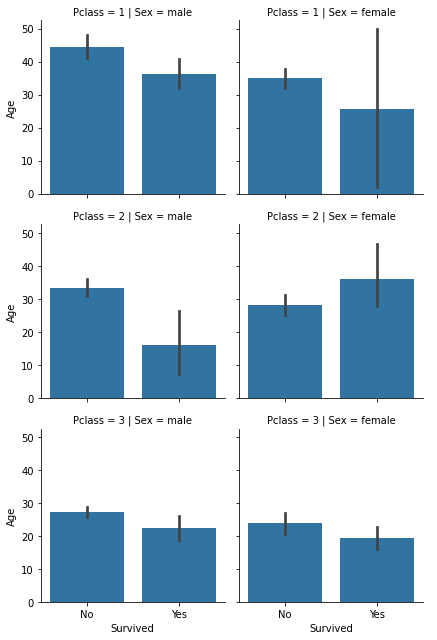

In [115]:
g = sns.FacetGrid(data, col="Sex",row = "Pclass")
g= g.map(sns.barplot,"Survived","Age")
g.add_legend()

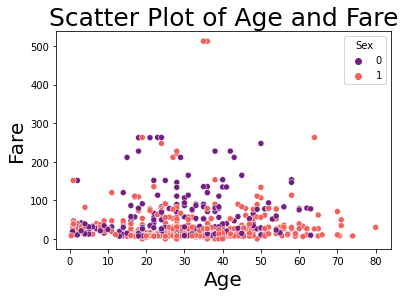

In [17]:
sns.scatterplot(x = "Age", y = "Fare", data = data, hue = "Sex", palette = "magma",sizes = (50, 300))
 
plt.title("Scatter Plot of Age and Fare", fontsize = 25) 
plt.xlabel("Age", fontsize = 20) 
plt.ylabel("Fare", fontsize = 20)
plt.savefig("Scatter Plot of Age and Fare") 
plt.show() 

In [117]:
Title_Dictionary = {

    "Capt":       "Officer",

    "Col":        "Officer",

    "Major":      "Officer",

    "Dr":         "Officer",

    "Rev":        "Officer",

    "Jonkheer":   "Royalty",

    "Don":        "Royalty",

    "Sir" :       "Royalty",

    "Lady" :      "Royalty",

    "the Countess": "Royalty",

    "Dona":       "Royalty",

    "Mme":        "Miss",

    "Mlle":       "Miss",

    "Miss" :      "Miss",

    "Ms":         "Mrs",

    "Mr" :        "Mrs",

    "Mrs" :       "Mrs",

    "Master" :    "Master"

                    }

In [118]:
output = data
data = data.append(Title_Dictionary,ignore_index=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,343.0,No,2.0,"Collander, Mr. Erik Gustaf",male,28.0,0.0,0.0,248740,13.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76.0,No,3.0,"Moen, Mr. Sigurd Hansen",male,25.0,0.0,0.0,348123,7.6500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,641.0,No,3.0,"Jensen, Mr. Hans Peder",male,20.0,0.0,0.0,350050,7.8542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,568.0,No,3.0,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0.0,4.0,349909,21.0750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,672.0,No,1.0,"Davidson, Mr. Thornton",male,31.0,1.0,0.0,F.C. 12750,52.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
data['New_Title']=data["Title"].map(Title_Dictionary)

In [151]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,New_Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr,Mrs
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr,Mrs
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr,Mrs
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,Mrs


In [154]:
data['New_Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: New_Title, dtype: int64

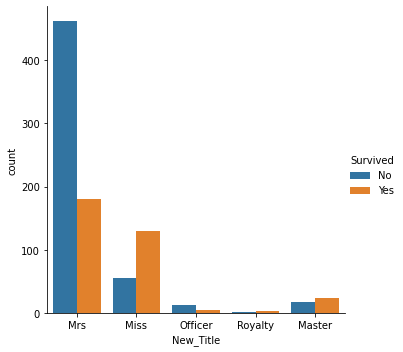

In [156]:
sns.catplot(x ="New_Title", hue ="Survived",kind ="count", data = data)

In [159]:
data['FamilySize'] = data['SibSp'] + data['Parch'] +1